# GameTheory-11-ReputationGames

## Jeux de Reputation : Construire et Maintenir sa Credibilite

Ce notebook explore les **jeux de reputation** ou les joueurs construisent une image aupres des autres a travers leurs actions passees.

### Objectifs

1. Comprendre le role de la **reputation** dans les interactions repetees
2. Analyser le **cheap talk** et ses limites
3. Etudier le modele de **Kreps-Wilson** (chaine de magasins)
4. Explorer les effets de reputation dans le **Dilemme du Prisonnier fini**
5. Maitriser les concepts d'**equilibre bayesien parfait**

### Prerequis

- Notebook 10 : Jeux bayesiens

In [1]:
# Configuration et imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional, Callable
from collections import defaultdict
import itertools

# Style matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)

## 1. Pourquoi la Reputation?

### 1.1 Motivation

Dans de nombreuses situations, un joueur peut beneficier d'une **reputation** de :
- Durete (monopole vs entrants)
- Honnetete (vendeur vs acheteurs)
- Competence (expert vs clients)
- Fiabilite (partenaire vs investisseurs)

### 1.2 Le Probleme

Avec **information complete** et jeu **fini** :
- L'induction arriere elimine les effets de reputation
- Toutes les menaces sont non-credibles a la fin
- Le paradoxe de la chaine de magasins (Notebook 8)

### 1.3 La Solution: Incertitude sur les Types

Kreps, Milgrom, Roberts & Wilson (1982) ont montre qu'une **petite probabilite** d'un type "irrationnel" ou "engage" suffit a maintenir la reputation.

In [2]:
# Illustration du probleme sans reputation

def chain_store_complete_info(n_markets=5):
    """
    Paradoxe de la chaine de magasins avec information complete.
    
    n_markets entrants sequentiels.
    Si entree: Monopole choisit Fight (-1,-1) ou Accommodate (1,1)
    Si pas d'entree: (0, 2)
    """
    print(f"Chaine de Magasins - Information Complete ({n_markets} marches)")
    print("="*60)
    
    # Induction arriere
    print("\nAnalyse par induction arriere:")
    print("-"*40)
    
    # Au dernier marche
    print(f"  Marche {n_markets} (dernier):")
    print(f"    Si entree, Monopole: Accommodate (1 > -1)")
    print(f"    Entrant: Enter (1 > 0)")
    
    # A l'avant-dernier
    print(f"\n  Marche {n_markets-1}:")
    print(f"    Meme raisonnement: Entrant entre, Monopole accommode")
    print(f"    Car 'Fight' ne change rien au marche suivant!")
    
    print(f"\n  ... (recursivement)")
    
    print(f"\n  Marche 1:")
    print(f"    Entrant entre, Monopole accommode")
    
    # Resultat
    total_monopole = n_markets * 1  # 1 par marche (accommodate)
    total_entrants = n_markets * 1  # 1 par entrant
    
    print("\n" + "="*60)
    print("\nResultat a l'equilibre:")
    print(f"  Tous les entrants entrent")
    print(f"  Monopole accommode toujours")
    print(f"  Gain Monopole: {total_monopole}")
    print(f"  Gain total Entrants: {total_entrants}")
    
    print("\n" + "="*60)
    print("\nParadoxe:")
    print(f"  Si le monopole pouvait CREDIBLEMENT menacer de combattre,")
    print(f"  il pourrait dissuader l'entree et gagner {n_markets * 2}!")
    print(f"  Mais l'induction arriere rend cette menace non-credible.")

chain_store_complete_info(n_markets=5)

Chaine de Magasins - Information Complete (5 marches)

Analyse par induction arriere:
----------------------------------------
  Marche 5 (dernier):
    Si entree, Monopole: Accommodate (1 > -1)
    Entrant: Enter (1 > 0)

  Marche 4:
    Meme raisonnement: Entrant entre, Monopole accommode
    Car 'Fight' ne change rien au marche suivant!

  ... (recursivement)

  Marche 1:
    Entrant entre, Monopole accommode


Resultat a l'equilibre:
  Tous les entrants entrent
  Monopole accommode toujours
  Gain Monopole: 5
  Gain total Entrants: 5


Paradoxe:
  Si le monopole pouvait CREDIBLEMENT menacer de combattre,
  il pourrait dissuader l'entree et gagner 10!
  Mais l'induction arriere rend cette menace non-credible.


## 2. Cheap Talk : Communication Non-Couteuse

### 2.1 Definition

Le **cheap talk** est une communication :
- **Gratuite** : ne coute rien a emettre
- **Non-verifiable** : ne peut pas etre prouvee vraie ou fausse
- **Non-engageante** : n'affecte pas directement les gains

### 2.2 Quand le Cheap Talk est-il Informatif?

Crawford & Sobel (1982) : Le cheap talk peut transmettre de l'information **partielle** si les interets ne sont pas trop divergents.

In [3]:
def analyze_cheap_talk():
    """
    Analyse du cheap talk: quand est-il credible?
    """
    print("Cheap Talk - Communication Non-Couteuse")
    print("="*60)
    
    print("\n1. Exemple: Embauche")
    print("-"*40)
    print("  Candidat: 'Je suis tres motive!'")
    print("  Employeur: '...'")
    print("\n  -> Non-informatif: TOUS les candidats disent ca!")
    print("     (Memes les non-motives ont interet a mentir)")
    
    print("\n2. Quand le cheap talk fonctionne:")
    print("-"*40)
    print("  a) Interets alignes:")
    print("     - Expert et decideur veulent la meme chose")
    print("     - Pas d'incitation a mentir")
    
    print("\n  b) Interets partiellement alignes:")
    print("     - Information partielle peut etre credible")
    print("     - Equilibres avec 'partition' de l'espace des types")
    
    print("\n  c) Verification ex-post:")
    print("     - Si le mensonge peut etre detecte plus tard")
    print("     - Avec penalite de reputation")
    
    print("\n" + "="*60)
    print("\n3. Modele Crawford-Sobel (simplifie):")
    print("-"*40)
    print("  - Expert connait theta in [0,1]")
    print("  - Envoie message m")
    print("  - Decideur choisit action a")
    print("  - Gains:")
    print("    Expert: -(a - theta - b)^2  (bias b > 0)")
    print("    Decideur: -(a - theta)^2")
    print("\n  Resultat: Plus b est grand, moins d'information transmise.")
    print("            Si b trop grand: equilibre 'babbling' (aucune info)")

analyze_cheap_talk()

Cheap Talk - Communication Non-Couteuse

1. Exemple: Embauche
----------------------------------------
  Candidat: 'Je suis tres motive!'
  Employeur: '...'

  -> Non-informatif: TOUS les candidats disent ca!
     (Memes les non-motives ont interet a mentir)

2. Quand le cheap talk fonctionne:
----------------------------------------
  a) Interets alignes:
     - Expert et decideur veulent la meme chose
     - Pas d'incitation a mentir

  b) Interets partiellement alignes:
     - Information partielle peut etre credible
     - Equilibres avec 'partition' de l'espace des types

  c) Verification ex-post:
     - Si le mensonge peut etre detecte plus tard
     - Avec penalite de reputation


3. Modele Crawford-Sobel (simplifie):
----------------------------------------
  - Expert connait theta in [0,1]
  - Envoie message m
  - Decideur choisit action a
  - Gains:
    Expert: -(a - theta - b)^2  (bias b > 0)
    Decideur: -(a - theta)^2

  Resultat: Plus b est grand, moins d'information tr

In [4]:
# Simulation du modele Crawford-Sobel

def crawford_sobel_simulation(bias=0.1, n_partitions=None):
    """
    Simule le modele de cheap talk Crawford-Sobel.
    
    Si bias est petit: equilibre avec plusieurs partitions
    Si bias est grand: equilibre babbling (1 partition)
    """
    # Nombre max de partitions en equilibre
    if bias > 0:
        n_max = int(np.floor(1/(4*bias) + 0.5)) if bias < 0.25 else 1
    else:
        n_max = float('inf')
    
    if n_partitions is None:
        n_partitions = n_max
    
    print(f"Crawford-Sobel avec bias b = {bias}")
    print("="*50)
    print(f"Nombre maximal de partitions: {n_max}")
    
    if n_partitions > n_max:
        print(f"\nEquilibre avec {n_partitions} partitions n'existe pas!")
        n_partitions = n_max
    
    # Calculer les frontieres des partitions
    # a_i = i/n + 2*b*i*(n-i) pour i = 0, 1, ..., n
    n = n_partitions
    boundaries = [i/n + 2*bias*i*(n-i) for i in range(n+1)]
    
    print(f"\nEquilibre avec {n} partition(s):")
    print(f"Frontieres: {[round(b, 3) for b in boundaries]}")
    
    # Calculer l'information transmise
    # Variance residuelle vs variance totale
    var_total = 1/12  # Variance de U[0,1]
    
    # Variance intra-partition
    var_intra = 0
    for i in range(n):
        a_i, a_ip1 = boundaries[i], boundaries[i+1]
        width = a_ip1 - a_i
        prob = width  # Uniforme
        var_partition = width**2 / 12  # Variance d'une uniforme sur [a_i, a_{i+1}]
        var_intra += prob * var_partition
    
    info_transmitted = 1 - var_intra / var_total
    
    print(f"\nInformation transmise: {info_transmitted*100:.1f}%")
    print(f"(1 = information complete, 0 = aucune)")
    
    return boundaries, info_transmitted


# Tester differents niveaux de bias
for b in [0.05, 0.1, 0.2, 0.3]:
    crawford_sobel_simulation(bias=b)
    print()

Crawford-Sobel avec bias b = 0.05
Nombre maximal de partitions: 5

Equilibre avec 5 partition(s):
Frontieres: [0.0, 0.6, 1.0, 1.2, 1.2, 1.0]

Information transmise: 72.0%
(1 = information complete, 0 = aucune)

Crawford-Sobel avec bias b = 0.1
Nombre maximal de partitions: 3

Equilibre avec 3 partition(s):
Frontieres: [0.0, 0.733, 1.067, 1.0]

Information transmise: 56.9%
(1 = information complete, 0 = aucune)

Crawford-Sobel avec bias b = 0.2
Nombre maximal de partitions: 1

Equilibre avec 1 partition(s):
Frontieres: [0.0, 1.0]

Information transmise: 0.0%
(1 = information complete, 0 = aucune)

Crawford-Sobel avec bias b = 0.3
Nombre maximal de partitions: 1

Equilibre avec 1 partition(s):
Frontieres: [0.0, 1.0]

Information transmise: 0.0%
(1 = information complete, 0 = aucune)



## 3. Le Modele de Kreps-Wilson : Reputation dans la Chaine de Magasins

### 3.1 L'Idee Cle

Kreps & Wilson (1982) resolvent le paradoxe de la chaine de magasins en introduisant une **petite incertitude** sur le type du monopole :

- Type **Normal** (prob $1-\epsilon$) : prefere Accommodate
- Type **Fou** (prob $\epsilon$) : prefere toujours Fight

### 3.2 Effet de la Reputation

Meme si $\epsilon$ est tres petit :
- Les premiers entrants hesitent (risque de tomber sur le Fou)
- Le monopole Normal peut **imiter** le Fou pour batir sa reputation
- La reputation de durete devient une **prophetie auto-realisatrice**

In [5]:
def kreps_wilson_chain_store(n_markets=5, epsilon=0.1):
    """
    Modele de Kreps-Wilson pour la chaine de magasins.
    
    Type Normal: Fight = -1, Accommodate = 1, pas d'entree = 2
    Type Fou: Fight = 1, pas d'entree = 2 (prefere toujours combattre)
    """
    print(f"Kreps-Wilson: Chaine de Magasins avec Reputation")
    print("="*60)
    print(f"Nombre de marches: {n_markets}")
    print(f"Probabilite du type Fou: epsilon = {epsilon}")
    
    # Gains
    print("\nGains:")
    print("  Type Normal: Fight=-1, Accommodate=1, No entry=2")
    print("  Type Fou: Fight=1 (toujours), No entry=2")
    print("  Entrant: Enter+Accommodate=1, Enter+Fight=-1, Out=0")
    
    # Croyances et strategies a l'equilibre
    print("\n" + "="*60)
    print("\nEquilibre (intuitif):")
    
    # Calculer le seuil de reputation
    # Un entrant n'entre pas si P(Fou | historique) est assez grand
    # Seuil: E[gain entrant] = prob_fou * (-1) + (1-prob_fou) * 1 = 0
    # => prob_fou = 0.5
    
    seuil_reputation = 0.5
    print(f"\nSeuil de reputation: {seuil_reputation}")
    print(f"  Si P(Fou) >= {seuil_reputation}, l'entrant n'entre pas")
    
    # Dynamique de reputation
    print("\n" + "="*60)
    print("\nDynamique de reputation:")
    
    # Simulation
    reputation = epsilon  # Croyance initiale
    print(f"\n  Croyance initiale: P(Fou) = {reputation:.3f}")
    
    # Combien de 'Fight' faut-il pour dissuader?
    # Apres k combats observes:
    # P(Fou | k combats) = P(k combats | Fou) * P(Fou) / P(k combats)
    #                    = 1 * epsilon / [epsilon + (1-epsilon) * p_fight_normal^k]
    
    # Si le Normal combat toujours (pooling avec Fou):
    # p_fight_normal = 1, donc reputation reste epsilon!
    # Pas d'apprentissage en pooling.
    
    # Strategie mixte du Normal:
    # Il doit combattre assez pour maintenir la reputation
    
    print("\n  Strategies possibles du monopole Normal:")
    print("    - Pooling: toujours Fight (imite le Fou)")
    print("    - Separateur: toujours Accommodate (revele son type)")
    print("    - Mixte: Fight avec probabilite pour maintenir reputation")
    
    # En pratique, equilibre complexe depend de n_markets et epsilon
    print("\n" + "="*60)
    print("\nResultat qualitatif:")
    
    if epsilon >= seuil_reputation:
        print(f"  epsilon = {epsilon} >= {seuil_reputation}")
        print(f"  -> Aucun entrant n'entre! Monopole gagne 2*{n_markets} = {2*n_markets}")
    else:
        # Nombre de marches ou l'entree est dissuadee
        # Approximation: log(seuil/epsilon) / log(2) marches dissuades
        k_dissuaded = max(0, int(np.log(seuil_reputation / epsilon) / np.log(2)))
        k_dissuaded = min(k_dissuaded, n_markets - 1)
        
        print(f"  epsilon = {epsilon} < {seuil_reputation}")
        print(f"  -> Environ {k_dissuaded} premiers entrants dissuades")
        print(f"  -> Monopole gagne plus qu'avec info complete!")

kreps_wilson_chain_store(n_markets=10, epsilon=0.1)

Kreps-Wilson: Chaine de Magasins avec Reputation
Nombre de marches: 10
Probabilite du type Fou: epsilon = 0.1

Gains:
  Type Normal: Fight=-1, Accommodate=1, No entry=2
  Type Fou: Fight=1 (toujours), No entry=2
  Entrant: Enter+Accommodate=1, Enter+Fight=-1, Out=0


Equilibre (intuitif):

Seuil de reputation: 0.5
  Si P(Fou) >= 0.5, l'entrant n'entre pas


Dynamique de reputation:

  Croyance initiale: P(Fou) = 0.100

  Strategies possibles du monopole Normal:
    - Pooling: toujours Fight (imite le Fou)
    - Separateur: toujours Accommodate (revele son type)
    - Mixte: Fight avec probabilite pour maintenir reputation


Resultat qualitatif:
  epsilon = 0.1 < 0.5
  -> Environ 2 premiers entrants dissuades
  -> Monopole gagne plus qu'avec info complete!


In [6]:
# Simulation numerique du jeu de reputation

def simulate_reputation_game(n_markets=10, epsilon=0.1, n_simulations=10000):
    """
    Simule le jeu de la chaine de magasins avec reputation.
    
    Strategie simplifiee:
    - Fou: toujours Fight
    - Normal: Fight si reputation < 0.5, sinon Accommodate
    - Entrant: Enter si reputation < 0.5, sinon Out
    """
    results = {'monopole_normal': [], 'monopole_fou': [], 'entrants': []}
    
    seuil = 0.5
    
    for _ in range(n_simulations):
        # Tirer le type
        is_fou = np.random.random() < epsilon
        
        reputation = epsilon  # Croyance courante
        gain_monopole = 0
        gains_entrants = []
        n_fights = 0
        
        for market in range(n_markets):
            # Decision de l'entrant
            if reputation >= seuil:
                # N'entre pas
                gain_monopole += 2
                gains_entrants.append(0)
            else:
                # Entre
                if is_fou:
                    # Fou combat toujours
                    gain_monopole += 1  # Fou prefere combattre
                    gains_entrants.append(-1)
                    n_fights += 1
                else:
                    # Normal: strategie basee sur les marches restants
                    remaining = n_markets - market - 1
                    if remaining > 0 and reputation < seuil:
                        # Combat pour batir reputation
                        gain_monopole -= 1
                        gains_entrants.append(-1)
                        n_fights += 1
                    else:
                        # Accommode
                        gain_monopole += 1
                        gains_entrants.append(1)
                
                # Mise a jour de la reputation (Bayes)
                # Si Fight observe:
                # P(Fou | Fight) = P(Fight | Fou) * P(Fou) / P(Fight)
                #                = 1 * reputation / [reputation + (1-reputation) * p_fight_normal]
                # Simplification: p_fight_normal = 0.8 si early, 0 si late
                if n_fights > 0:
                    p_fight_normal = 0.8 if market < n_markets - 2 else 0.1
                    reputation = reputation / (reputation + (1-reputation) * p_fight_normal)
        
        if is_fou:
            results['monopole_fou'].append(gain_monopole)
        else:
            results['monopole_normal'].append(gain_monopole)
        results['entrants'].append(sum(gains_entrants))
    
    # Affichage
    print(f"\nSimulation: {n_markets} marches, epsilon={epsilon}, {n_simulations} sims")
    print("="*50)
    if results['monopole_normal']:
        print(f"  Monopole Normal - Gain moyen: {np.mean(results['monopole_normal']):.2f}")
    if results['monopole_fou']:
        print(f"  Monopole Fou - Gain moyen: {np.mean(results['monopole_fou']):.2f}")
    print(f"  Entrants - Gain total moyen: {np.mean(results['entrants']):.2f}")
    
    # Comparaison avec info complete
    print(f"\n  Reference (info complete): Monopole = {n_markets}, Entrants = {n_markets}")
    
    return results

# Tester
results = simulate_reputation_game(n_markets=10, epsilon=0.1)


Simulation: 10 marches, epsilon=0.1, 10000 sims
  Monopole Normal - Gain moyen: -7.00
  Monopole Fou - Gain moyen: 11.00
  Entrants - Gain total moyen: -9.00

  Reference (info complete): Monopole = 10, Entrants = 10



Simulation: 10 marches, epsilon=0.01, 5000 sims
  Monopole Normal - Gain moyen: -8.00
  Monopole Fou - Gain moyen: 10.00
  Entrants - Gain total moyen: -8.02

  Reference (info complete): Monopole = 10, Entrants = 10

Simulation: 10 marches, epsilon=0.05, 5000 sims
  Monopole Normal - Gain moyen: -7.00
  Monopole Fou - Gain moyen: 11.00
  Entrants - Gain total moyen: -9.00

  Reference (info complete): Monopole = 10, Entrants = 10

Simulation: 10 marches, epsilon=0.1, 5000 sims
  Monopole Normal - Gain moyen: -7.00
  Monopole Fou - Gain moyen: 11.00
  Entrants - Gain total moyen: -9.00

  Reference (info complete): Monopole = 10, Entrants = 10

Simulation: 10 marches, epsilon=0.2, 5000 sims
  Monopole Normal - Gain moyen: -1.00
  Monopole Fou - Gain moyen: 13.00
  Entrants - Gain total moyen: -7.00

  Reference (info complete): Monopole = 10, Entrants = 10

Simulation: 10 marches, epsilon=0.3, 5000 sims
  Monopole Normal - Gain moyen: 8.00
  Monopole Fou - Gain moyen: 16.00
  Entrants

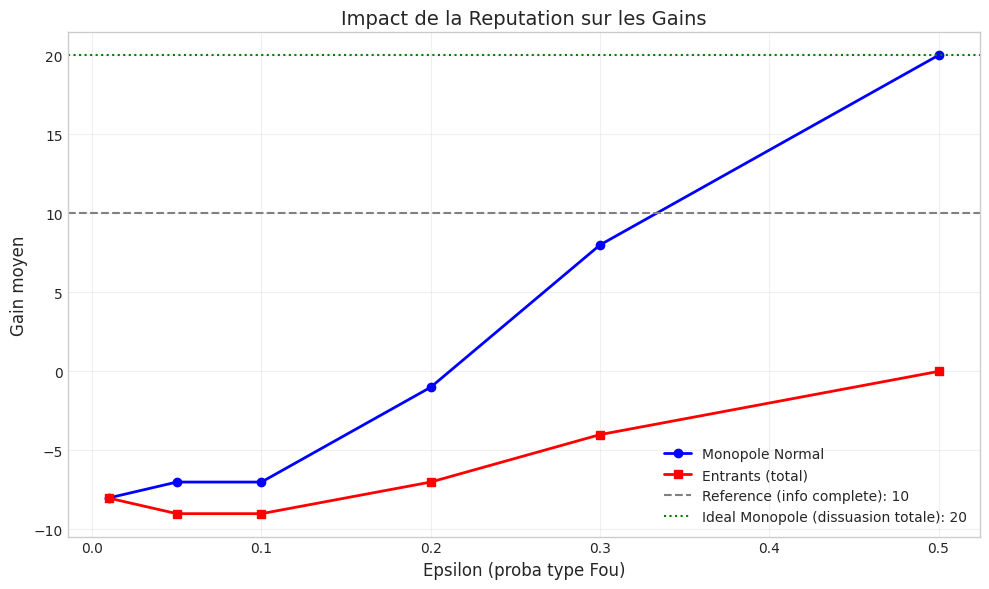

In [7]:
# Impact de epsilon sur les gains

def analyze_epsilon_impact():
    """Analyse l'impact de la probabilite du type Fou."""
    epsilons = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
    n_markets = 10
    
    gains_normal = []
    gains_entrants = []
    
    for eps in epsilons:
        results = simulate_reputation_game(n_markets, eps, n_simulations=5000)
        if results['monopole_normal']:
            gains_normal.append(np.mean(results['monopole_normal']))
        else:
            gains_normal.append(np.nan)
        gains_entrants.append(np.mean(results['entrants']))
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(epsilons, gains_normal, 'b-o', linewidth=2, label='Monopole Normal')
    ax.plot(epsilons, gains_entrants, 'r-s', linewidth=2, label='Entrants (total)')
    ax.axhline(n_markets, color='gray', linestyle='--', label=f'Reference (info complete): {n_markets}')
    ax.axhline(2*n_markets, color='green', linestyle=':', label=f'Ideal Monopole (dissuasion totale): {2*n_markets}')
    
    ax.set_xlabel('Epsilon (proba type Fou)', fontsize=12)
    ax.set_ylabel('Gain moyen', fontsize=12)
    ax.set_title('Impact de la Reputation sur les Gains', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

analyze_epsilon_impact()

## 4. Le "Gang of Four" : Cooperation dans le Dilemme du Prisonnier Fini

### 4.1 Le Puzzle

Dilemme du Prisonnier repete **T** fois (fini) :
- L'induction arriere predit : Defection a CHAQUE tour
- Mais les experiences montrent souvent de la cooperation!

### 4.2 La Solution KMRW

Kreps, Milgrom, Roberts & Wilson (1982) : Meme une **infime probabilite** d'un type "Tit-for-Tat" suffit a maintenir la cooperation pendant la plupart des tours.

In [8]:
def kmrw_prisoners_dilemma(T=20, epsilon=0.05):
    """
    Modele KMRW pour le Dilemme du Prisonnier fini.
    
    Type Normal: prefere D
    Type TFT: joue Tit-for-Tat
    """
    print(f"KMRW: Dilemme du Prisonnier Repete {T} fois")
    print("="*60)
    print(f"Probabilite du type TFT: epsilon = {epsilon}")
    
    # Gains standard
    print("\nMatrice de gains:")
    print("         C       D")
    print("  C    (3,3)   (0,5)")
    print("  D    (5,0)   (1,1)")
    
    print("\n" + "="*60)
    print("\nAnalyse:")
    
    # Sans incertitude: D a chaque tour
    gain_defect_all = T * 1
    print(f"\n  Sans incertitude (info complete):")
    print(f"    Equilibre: (D, D) a chaque tour")
    print(f"    Gain par joueur: {gain_defect_all}")
    
    # Avec incertitude: cooperation possible
    print(f"\n  Avec incertitude (epsilon = {epsilon}):")
    
    # Intuition: si les deux croient que l'autre POURRAIT etre TFT,
    # il est rationnel de cooperer pour "tester" puis exploiter
    # Mais meme le type Normal peut vouloir imiter TFT!
    
    # Calcul approximatif du nombre de tours de cooperation
    # A l'equilibre, cooperation jusqu'au tour t* tel que:
    # Gain de D maintenant < Gain de C puis exploitation ensuite
    # 5 < 3 + delta * (5 + ...) depend de la dynamique des croyances
    
    # Approximation: cooperation pendant environ T - log(1/epsilon)/log(delta') tours
    # Pour simplifier:
    cooperation_rounds = max(0, T - int(np.log(1/epsilon) / np.log(2)))
    
    print(f"    Cooperation pendant environ {cooperation_rounds} tours (heuristique)")
    
    # Gain avec cooperation partielle
    gain_coop = cooperation_rounds * 3 + (T - cooperation_rounds) * 1
    print(f"    Gain approximatif par joueur: {gain_coop}")
    
    print(f"\n  Amelioration: {gain_coop - gain_defect_all} ({(gain_coop/gain_defect_all - 1)*100:.1f}%)")
    
    print("\n" + "="*60)
    print("\nConclusion KMRW:")
    print("  'A small amount of incomplete information can have")
    print("   a large effect on the equilibrium of a game.'")

kmrw_prisoners_dilemma(T=20, epsilon=0.05)

KMRW: Dilemme du Prisonnier Repete 20 fois
Probabilite du type TFT: epsilon = 0.05

Matrice de gains:
         C       D
  C    (3,3)   (0,5)
  D    (5,0)   (1,1)


Analyse:

  Sans incertitude (info complete):
    Equilibre: (D, D) a chaque tour
    Gain par joueur: 20

  Avec incertitude (epsilon = 0.05):
    Cooperation pendant environ 16 tours (heuristique)
    Gain approximatif par joueur: 52

  Amelioration: 32 (160.0%)


Conclusion KMRW:
  'A small amount of incomplete information can have
   a large effect on the equilibrium of a game.'



Simulation: T=20, epsilon=0.1, 5000 parties
  Gain moyen P1: 54.33
  Gain moyen P2: 54.32
  Reference (D,D) tout le temps: 20
  Reference (C,C) tout le temps: 60


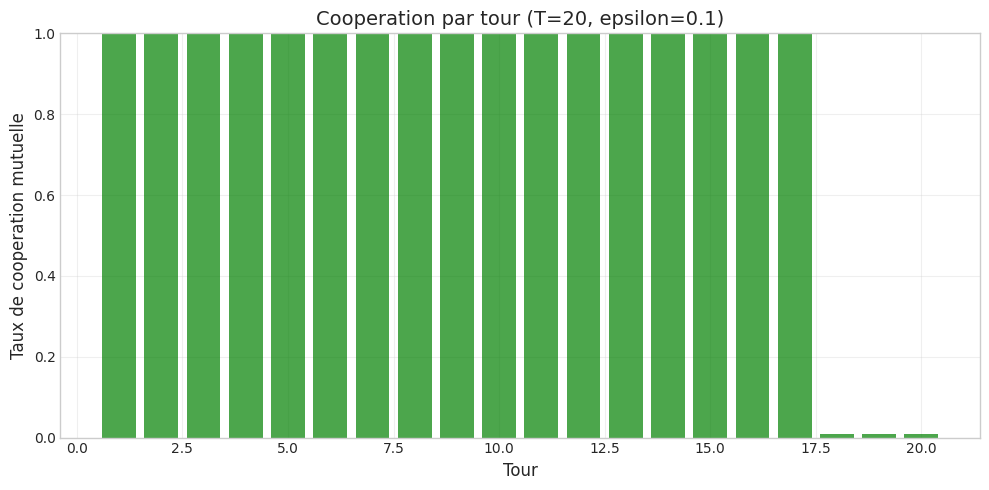

In [9]:
# Simulation du DP fini avec reputation

def simulate_pd_with_reputation(T=20, epsilon=0.1, n_sims=5000):
    """
    Simule le Dilemme du Prisonnier repete avec types.
    
    Strategie heuristique:
    - TFT: Coopere d'abord, puis copie l'adversaire
    - Normal: Coopere tant que l'autre coopere ET tours restants > seuil
              Defecte a la fin ou si l'autre defecte
    """
    payoffs = {
        ('C', 'C'): (3, 3),
        ('C', 'D'): (0, 5),
        ('D', 'C'): (5, 0),
        ('D', 'D'): (1, 1)
    }
    
    results = []
    coop_by_round = np.zeros(T)
    
    for _ in range(n_sims):
        # Tirer les types
        p1_is_tft = np.random.random() < epsilon
        p2_is_tft = np.random.random() < epsilon
        
        # Croyances
        belief_1 = epsilon  # Croyance de P1 que P2 est TFT
        belief_2 = epsilon  # Croyance de P2 que P1 est TFT
        
        gains = [0, 0]
        history_1 = []  # Actions de P1
        history_2 = []  # Actions de P2
        
        for t in range(T):
            remaining = T - t
            
            # Decision de P1
            if p1_is_tft:
                # TFT
                if not history_2:
                    a1 = 'C'
                else:
                    a1 = history_2[-1]
            else:
                # Normal: heuristique
                if remaining > 3 and (not history_2 or history_2[-1] == 'C'):
                    a1 = 'C'  # Coopere pour maintenir reputation
                else:
                    a1 = 'D'  # Defecte a la fin
            
            # Decision de P2 (symetrique)
            if p2_is_tft:
                if not history_1:
                    a2 = 'C'
                else:
                    a2 = history_1[-1]
            else:
                if remaining > 3 and (not history_1 or history_1[-1] == 'C'):
                    a2 = 'C'
                else:
                    a2 = 'D'
            
            # Gains
            p1, p2 = payoffs[(a1, a2)]
            gains[0] += p1
            gains[1] += p2
            
            # Enregistrer
            history_1.append(a1)
            history_2.append(a2)
            
            if a1 == 'C' and a2 == 'C':
                coop_by_round[t] += 1
        
        results.append(gains)
    
    results = np.array(results)
    coop_by_round /= n_sims
    
    print(f"\nSimulation: T={T}, epsilon={epsilon}, {n_sims} parties")
    print("="*50)
    print(f"  Gain moyen P1: {results[:, 0].mean():.2f}")
    print(f"  Gain moyen P2: {results[:, 1].mean():.2f}")
    print(f"  Reference (D,D) tout le temps: {T}")
    print(f"  Reference (C,C) tout le temps: {T * 3}")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(range(1, T+1), coop_by_round, color='green', alpha=0.7)
    ax.set_xlabel('Tour', fontsize=12)
    ax.set_ylabel('Taux de cooperation mutuelle', fontsize=12)
    ax.set_title(f'Cooperation par tour (T={T}, epsilon={epsilon})', fontsize=14)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return results, coop_by_round

results, coop = simulate_pd_with_reputation(T=20, epsilon=0.1)

## 5. Equilibre Bayesien Parfait

### 5.1 Definition

Un **Equilibre Bayesien Parfait (PBE)** est un profil de strategies ET un systeme de croyances tel que :

1. **Consistance sequentielle** : Les croyances sont derivees par Bayes quand c'est possible
2. **Rationalite sequentielle** : A chaque information set, le joueur maximise son gain espere etant donnees ses croyances

### 5.2 Relation avec autres concepts

```
    PBE
     |
     v
    SPE (info parfaite)
     |
     v
   Nash
```

In [10]:
def explain_pbe():
    """Explication de l'equilibre bayesien parfait."""
    print("Equilibre Bayesien Parfait (PBE)")
    print("="*60)
    
    print("\n1. Composantes:")
    print("-"*40)
    print("  a) Profil de strategies: sigma_i(t_i, h) pour chaque joueur")
    print("     - Depend du type t_i et de l'historique h")
    print("\n  b) Systeme de croyances: mu(t | h) pour chaque info set")
    print("     - Probabilite des types des autres conditionnelle a h")
    
    print("\n2. Conditions d'equilibre:")
    print("-"*40)
    print("  a) Consistance: mu derive de sigma par Bayes quand possible")
    print("     mu(t | h) = P(h | t) * P(t) / P(h)")
    print("\n  b) Rationalite: sigma optimal etant donne mu")
    print("     sigma_i(t_i, h) in argmax E[u_i | t_i, h, mu]")
    
    print("\n3. Exemple: Jeu de signaling")
    print("-"*40)
    print("  Emetteur (S): Nature tire type in {H, L}")
    print("  S observe type, envoie signal m in {m1, m2}")
    print("  Recepteur (R): observe m, choisit action a")
    print("\n  PBE specifie:")
    print("    - sigma_S: strategie de S pour chaque type")
    print("    - sigma_R: strategie de R pour chaque signal")
    print("    - mu: croyance de R sur le type apres chaque signal")
    
    print("\n4. Types d'equilibres de signaling:")
    print("-"*40)
    print("  - Separateur: types differents -> signaux differents")
    print("    mu revele parfaitement le type")
    print("  - Pooling: tous les types -> meme signal")
    print("    mu = prior (pas d'apprentissage)")
    print("  - Semi-separateur: certains types se distinguent")

explain_pbe()

Equilibre Bayesien Parfait (PBE)

1. Composantes:
----------------------------------------
  a) Profil de strategies: sigma_i(t_i, h) pour chaque joueur
     - Depend du type t_i et de l'historique h

  b) Systeme de croyances: mu(t | h) pour chaque info set
     - Probabilite des types des autres conditionnelle a h

2. Conditions d'equilibre:
----------------------------------------
  a) Consistance: mu derive de sigma par Bayes quand possible
     mu(t | h) = P(h | t) * P(t) / P(h)

  b) Rationalite: sigma optimal etant donne mu
     sigma_i(t_i, h) in argmax E[u_i | t_i, h, mu]

3. Exemple: Jeu de signaling
----------------------------------------
  Emetteur (S): Nature tire type in {H, L}
  S observe type, envoie signal m in {m1, m2}
  Recepteur (R): observe m, choisit action a

  PBE specifie:
    - sigma_S: strategie de S pour chaque type
    - sigma_R: strategie de R pour chaque signal
    - mu: croyance de R sur le type apres chaque signal

4. Types d'equilibres de signaling:
-

## 6. Exercices

### Exercice 1: Beer-Quiche Game

Jeu de signaling classique:
- Nature: type S (Strong, p=0.9) ou W (Weak, p=0.1)
- S prefere Beer, W prefere Quiche
- R observe le petit-dejeuner et decide: Fight ou Not
- R prefere Fight si W, Not si S

Trouvez tous les PBE.

### Exercice 2: Reputation avec Plusieurs Adversaires Simultanes

Modifiez le modele de Kreps-Wilson pour un monopole faisant face a N entrants simultanement (pas sequentiellement).

### Exercice 3: Cheap Talk avec Verification

Reprenez le modele Crawford-Sobel mais avec une probabilite p que le message soit verifie apres coup. Comment cela affecte-t-il la quantite d'information transmise?

In [11]:
# Espace pour vos solutions

# Exercice 1: Beer-Quiche
def solve_beer_quiche():
    """Resout le jeu Beer-Quiche."""
    print("Beer-Quiche Game")
    print("="*50)
    
    print("\nSetup:")
    print("  P(Strong) = 0.9, P(Weak) = 0.1")
    print("  Strong prefere Beer (+1), Weak prefere Quiche (+1)")
    print("  Si Fight: S gagne, W perd")
    print("  Si Not: tous OK")
    
    print("\nPBE potentiels:")
    print("  1. Pooling sur Beer: tous choisissent Beer")
    print("     - R croit: P(S|Beer) = 0.9 -> Not Fight")
    print("     - W: Beer + Not -> bon (evite Fight)")
    print("     - Deviation de W vers Quiche? Depend des croyances hors equilibre")
    
    print("\n  2. Separateur: S->Beer, W->Quiche")
    print("     - R: Fight apres Quiche, Not apres Beer")
    print("     - W veut-il devier vers Beer? Oui si Not > Fight")
    print("     -> Pas d'equilibre separateur stable")
    
    print("\n  => PBE: Pooling sur Beer avec croyances appropriees")

solve_beer_quiche()

Beer-Quiche Game

Setup:
  P(Strong) = 0.9, P(Weak) = 0.1
  Strong prefere Beer (+1), Weak prefere Quiche (+1)
  Si Fight: S gagne, W perd
  Si Not: tous OK

PBE potentiels:
  1. Pooling sur Beer: tous choisissent Beer
     - R croit: P(S|Beer) = 0.9 -> Not Fight
     - W: Beer + Not -> bon (evite Fight)
     - Deviation de W vers Quiche? Depend des croyances hors equilibre

  2. Separateur: S->Beer, W->Quiche
     - R: Fight apres Quiche, Not apres Beer
     - W veut-il devier vers Beer? Oui si Not > Fight
     -> Pas d'equilibre separateur stable

  => PBE: Pooling sur Beer avec croyances appropriees


## 7. Resume

| Concept | Description |
|---------|-------------|
| **Reputation** | Image basee sur les actions passees |
| **Cheap Talk** | Communication gratuite et non-verifiable |
| **Type behavioural** | Type engage dans un comportement (ex: TFT, Fou) |
| **Imitation strategique** | Type normal imitant le type behavioural |
| **PBE** | Equilibre avec croyances et strategies coherentes |

### Points cles

- Une **petite incertitude** peut avoir de **grands effets**
- La reputation permet de rendre credibles des menaces autrement vides
- Le **cheap talk** est limite mais peut transmettre de l'information partielle
- L'**equilibre bayesien parfait** formalise la coherence croyances-strategies

### Prochaine etape

**Notebook 12 : CFR et Information Imparfaite** - Algorithmes pour resoudre les grands jeux a information imparfaite (poker, etc.).